## Seaborn Dataset - "tips"

### Import related libraries

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

### Load tips dataset

In [3]:
tips = sns.load_dataset("tips")

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


### Plot a bar chart showing the average of daily total_bill amounts with confidence interval (% 95) bars.

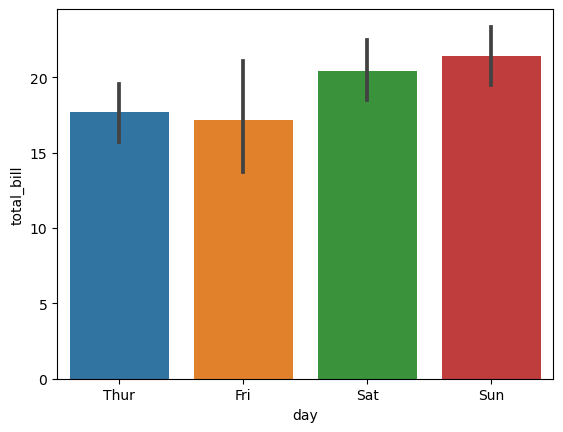

In [6]:
sns.barplot(x="day", y="total_bill", data=tips, ci=95);

## Calculate the Confidence Intervals of the total bill for Friday. (ci = % 95)

### Calculate the average.

In [7]:
xbar = tips[tips["day"] == "Fri"]["total_bill"].mean()
xbar

17.151578947368417

### Calculate the standard deviation.

In [8]:
s = tips[tips["day"] == "Fri"]["total_bill"].std()
s

8.302659723217143

### Calculate the standard error of the mean.

In [9]:
tips[tips["day"] == "Fri"]["total_bill"].std() / np.sqrt(len(tips[tips["day"] == "Fri"]["total_bill"]))

1.904760773479416

In [10]:
sem = tips[tips["day"] == "Fri"]["total_bill"].sem()
sem

1.904760773479416

### Calculate the margin of error.

In [11]:
moe = 1.96 * sem
moe

3.7333311160196554

### Calculate lower limit and upper limit. 

In [12]:
lower_limit = xbar - moe
lower_limit

13.418247831348761

In [13]:
upper_limit = xbar + moe
upper_limit

20.884910063388073

### Calculate the Confidence Intervals by using the Normal Distribution  (% 95)
**This approach is used to calculate Confidence Intervals for the large dataset where the n>30 and for this, the user needs to call the norm.interval() function from the scipy.stats library to get the confidence interval for a population means of the given dataset where the dataset is normally distributed in python.**

In [14]:
# Relevant dataset
# mean
# standard error of the mean
# desired confidence interval percentage
# confidence interval code from scipy 

In [15]:
stats.norm.interval(0.95, loc=xbar, scale=sem)

(13.418316432184106, 20.88484146255273)

### Calculate Confidence Intervals by using the t - Distribution  (% 95)
**This approach is used to calculate Confidence Intervals for the small dataset where the n<=30 and for this, the user needs to call the t.interval() function from the scipy.stats library to get the confidence interval for a population means of the given dataset in python.**

In [16]:
# Relevant dataset
# mean
# standard error of the mean
# desired confidence interval percentage
# degrees of freedom
# confidence interval code from scipy 

In [17]:
n = len(tips[tips["day"] == "Fri"]["total_bill"])
n

19

In [18]:
stats.t.interval(0.95, df=n-1, loc=xbar, scale=sem)

(13.149825056979093, 21.15333283775774)

## Calculate the Confidence Intervals of the total bill for Saturday.

### Calculate the average.

In [19]:
xbar = tips[tips["day"] == "Sat"]["total_bill"].mean()
xbar

20.441379310344825

### Calculate the standard error of the mean.

In [20]:
sem = tips[tips["day"] == "Sat"]["total_bill"].sem()
sem

1.016407566061897

### Calculate the Confidence Intervals by using the Normal Distribution  (% 95)

In [21]:
stats.norm.interval(0.95, xbar, sem)

(18.449257087249492, 22.433501533440158)

### Calculate Confidence Intervals by using the t - Distribution  (% 95)

In [22]:
n = len(tips[tips["day"] == "Sat"]["total_bill"])
n

87

In [23]:
stats.t.interval(0.95, n-1, xbar, sem)  # This is the best (t distribution)

(18.420827942450163, 22.461930678239487)

### Calculate Confidence Intervals by using the t - Distribution  (% 99)

In [24]:
stats.t.interval(0.99, n-1, xbar, sem)  # The higher the confidence level, the wider the confidence interval.

(17.76394599025322, 23.11881263043643)